In [3]:
from tensorflow.keras.datasets.boston_housing import load_data

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

import numpy as np

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

x_test.shape, y_test.shape

(404, 13) (404,)
(102, 13) (102,)


((102, 13), (102,))

In [5]:
from tensorflow import keras

model = keras.models.load_model("BostonHousingPrice.h5")

Metal device set to: Apple M1 Pro


2022-09-19 18:19:44.115162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-19 18:19:44.115278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [40]:
p_values = []

sub_total = 0

for i in range(x_test.shape[0]):
    input_data = x_test[i].reshape((-1,13))
    p_value = model.predict(input_data)
    print(i,"\tp_value : ",p_value,", real : ",y_test[i],"(sub : ",abs(p_value-y_test[i]),")")
    sub_total+=abs(p_value-y_test[i])
    p_values.append(p_value[0][0])
print("total : ",sub_total,", avg : ",sub_total/len(y_test))

1/1 [==============================] - 0s 11ms/step
0 	p_value :  [[21.362482]] , real :  21.4 (sub :  [[0.03751755]] )
1/1 [==============================] - 0s 11ms/step
1 	p_value :  [[20.648026]] , real :  24.0 (sub :  [[3.3519745]] )
1/1 [==============================] - 0s 10ms/step
2 	p_value :  [[46.507267]] , real :  50.0 (sub :  [[3.492733]] )
1/1 [==============================] - 0s 10ms/step
3 	p_value :  [[23.47844]] , real :  24.1 (sub :  [[0.62156105]] )
1/1 [==============================] - 0s 9ms/step
4 	p_value :  [[13.711675]] , real :  13.5 (sub :  [[0.21167469]] )
1/1 [==============================] - 0s 10ms/step
5 	p_value :  [[32.70888]] , real :  37.9 (sub :  [[5.19112]] )
1/1 [==============================] - 0s 10ms/step
6 	p_value :  [[25.010862]] , real :  28.4 (sub :  [[3.3891373]] )
1/1 [==============================] - 0s 11ms/step
7 	p_value :  [[29.343508]] , real :  37.0 (sub :  [[7.656492]] )
1/1 [==============================] - 0s 11ms/step


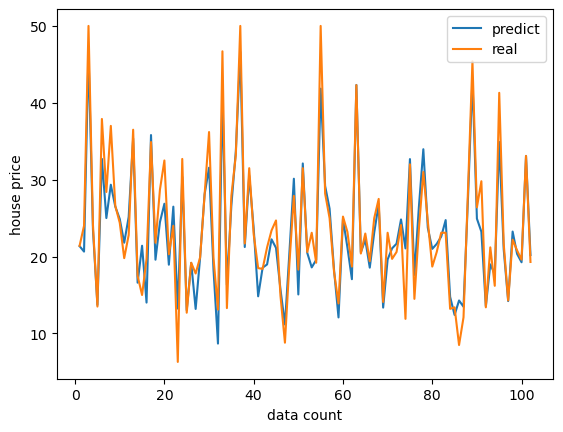

In [53]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(p_values) + 1), p_values, label='predict')
plt.plot(range(1, len(y_test) + 1), y_test, label='real')
plt.xlabel('data count')
plt.ylabel('house price')
plt.legend(loc='upper right')
plt.show()

In [48]:
from datetime import datetime

print("predict start  : ",datetime.now())
for i in range(x_test.shape[0]):
    input_data = x_test[i].reshape((-1,13))
    model.predict(input_data, verbose=0)
print("predict finish : ",datetime.now())

predict start  :  2022-09-19 18:37:35.390828
predict finish :  2022-09-19 18:37:37.632757


In [50]:
from datetime import datetime
import tensorflow as tf

print("predict start  : ",datetime.now())
with tf.device('/CPU:0'):
    for i in range(x_test.shape[0]):
        input_data = x_test[i].reshape((-1,13))
        model.predict(input_data, verbose=0)
print("predict finish : ",datetime.now())

predict start  :  2022-09-19 18:37:40.359561
predict finish :  2022-09-19 18:37:42.441314
